In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
# Leer datos
df_dpto = pd.read_csv("../../data/processed/suelo_forestal_depto.csv")

In [10]:
df_dpto['Fecha'] = pd.to_datetime(df_dpto['ano'], format='%Y')
df_dpto = df_dpto.sort_values(['depto', 'Fecha'])

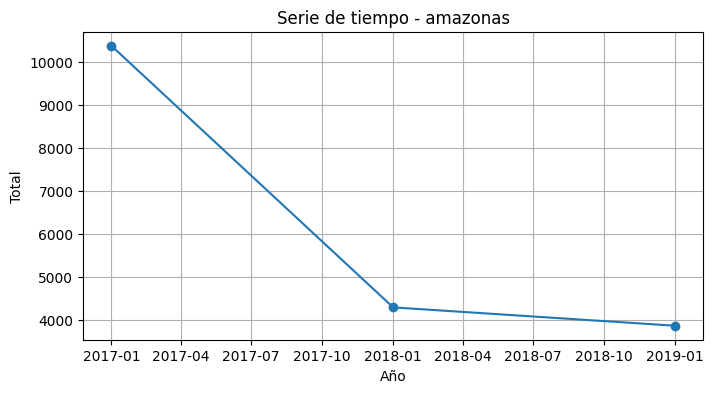

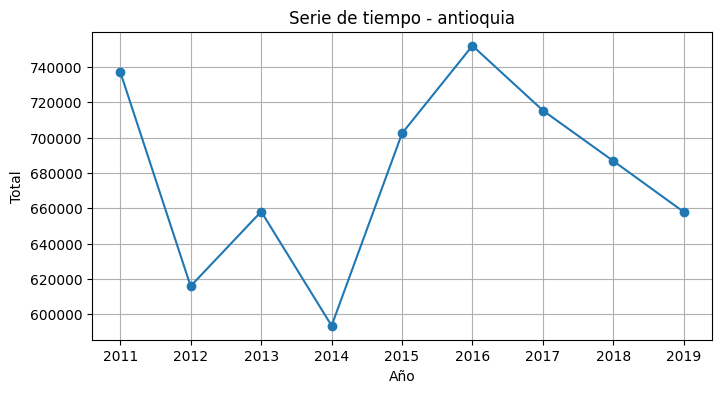

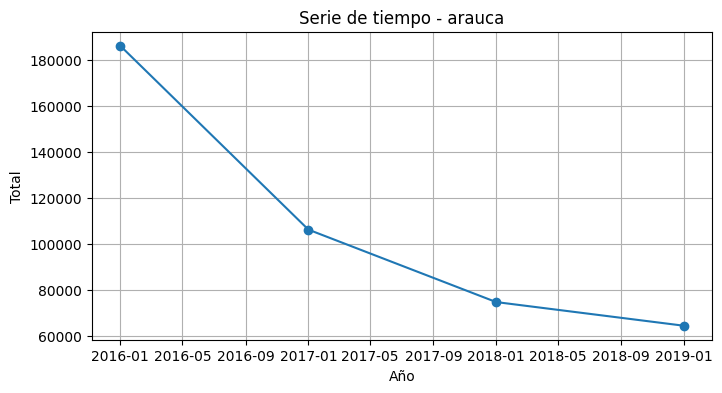

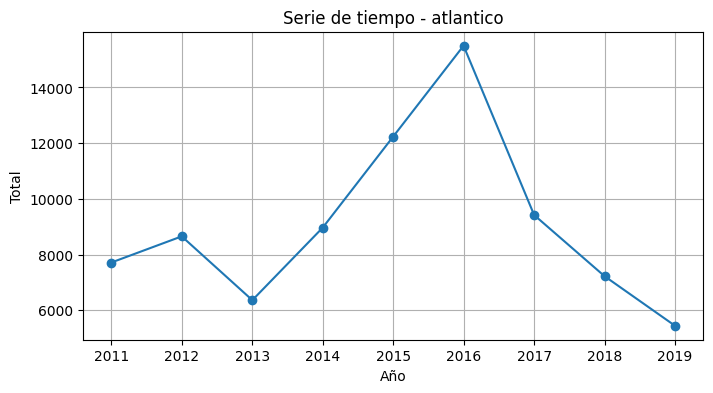

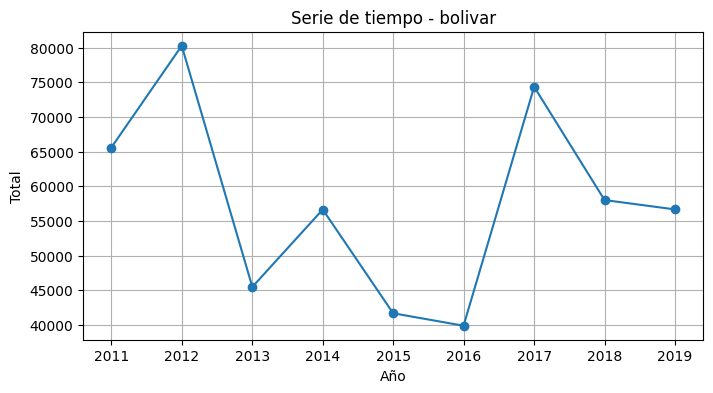

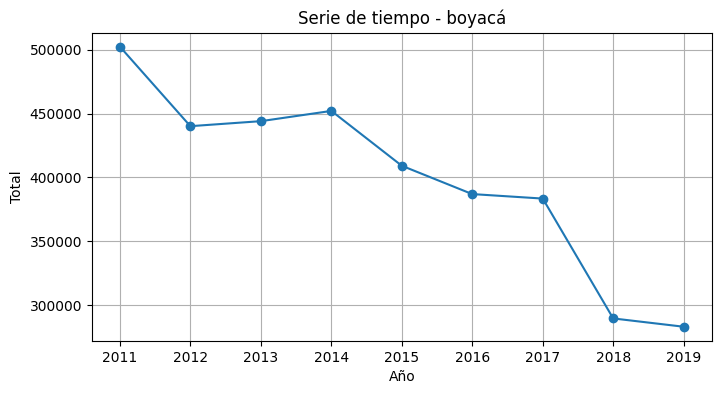

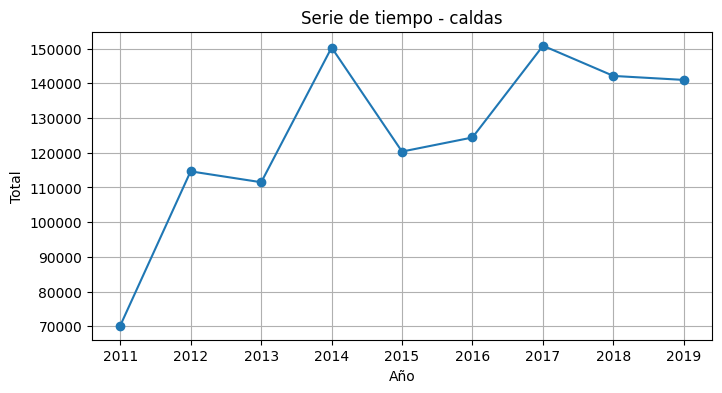

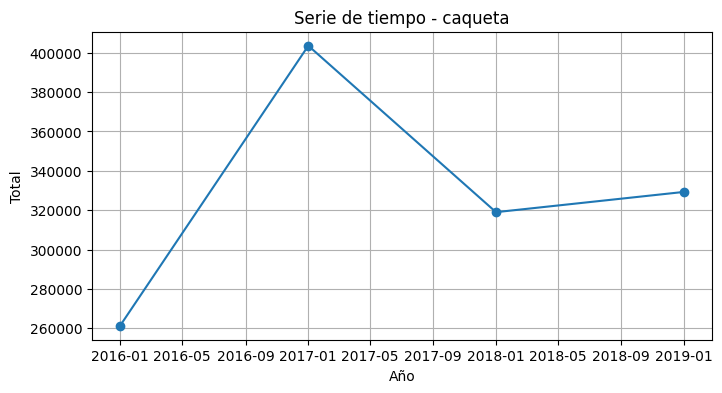

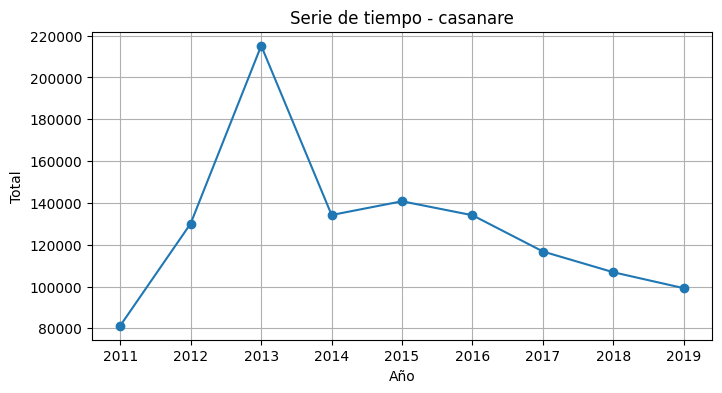

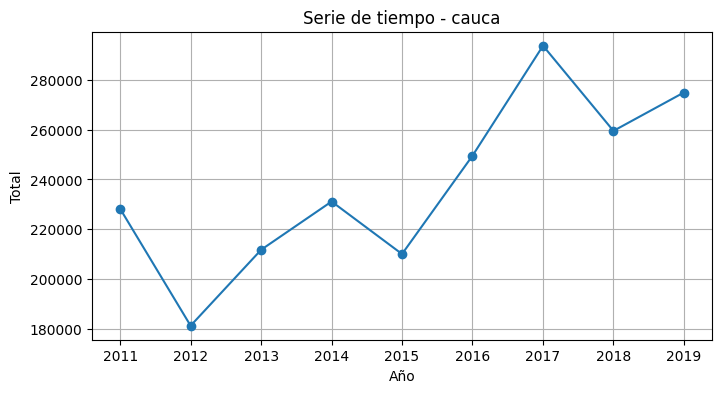

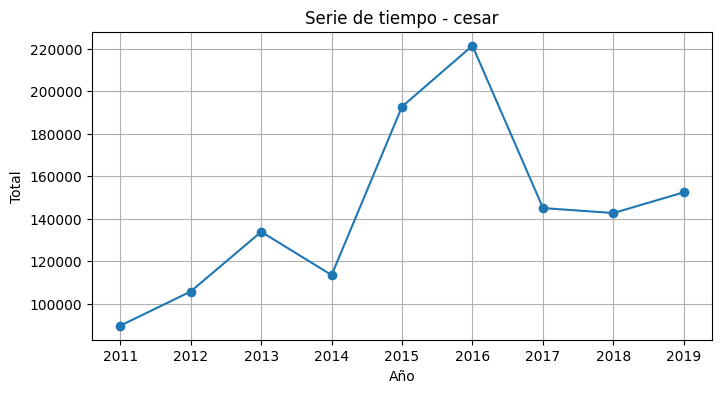

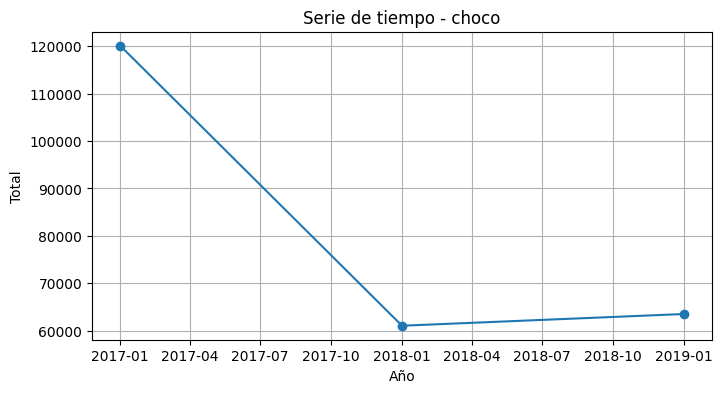

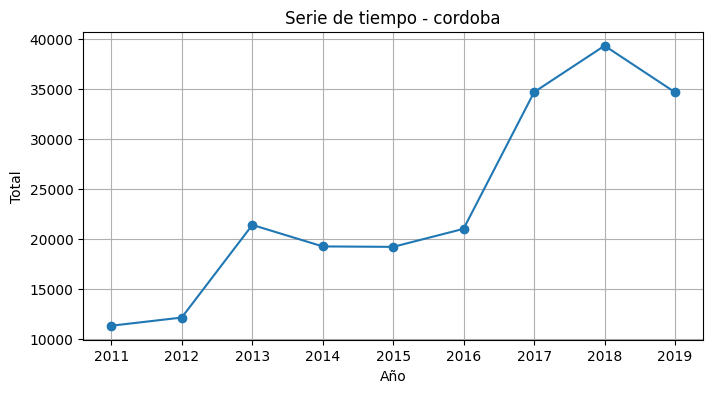

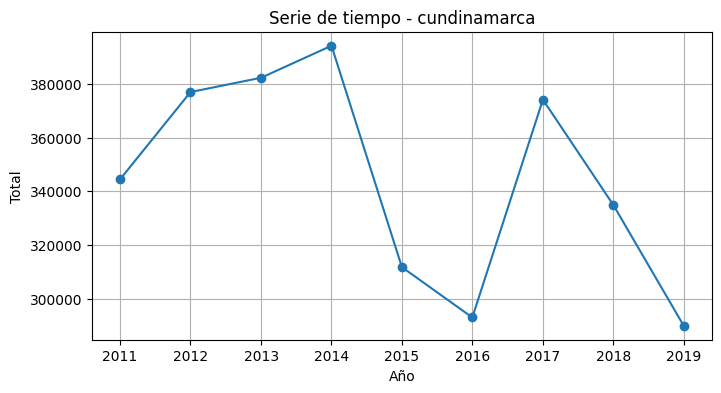

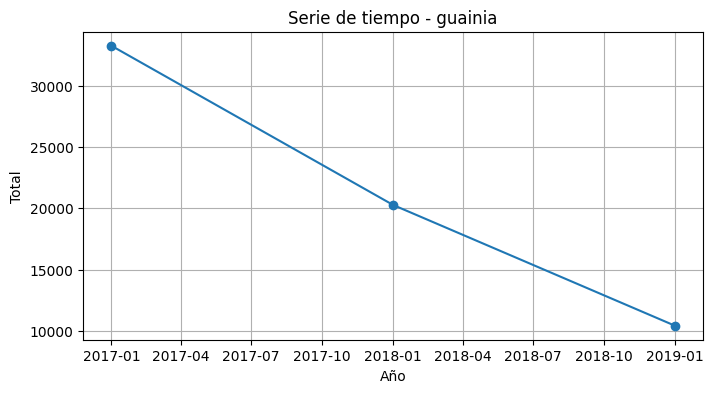

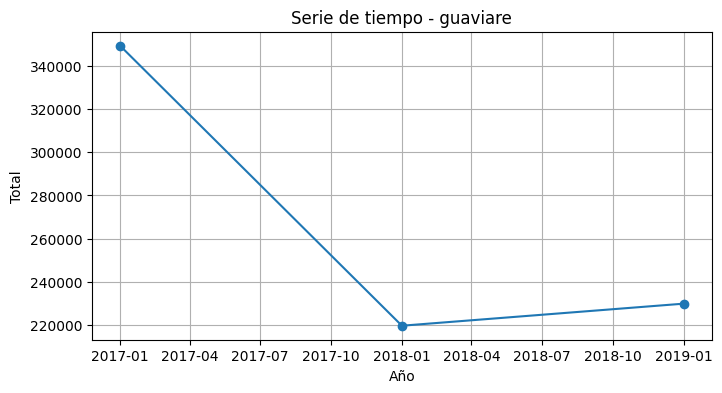

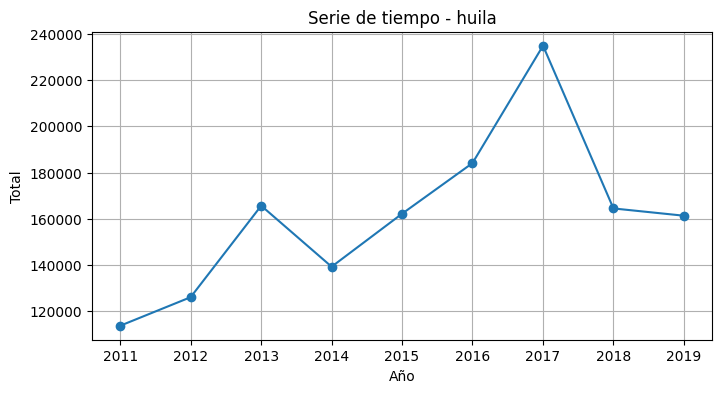

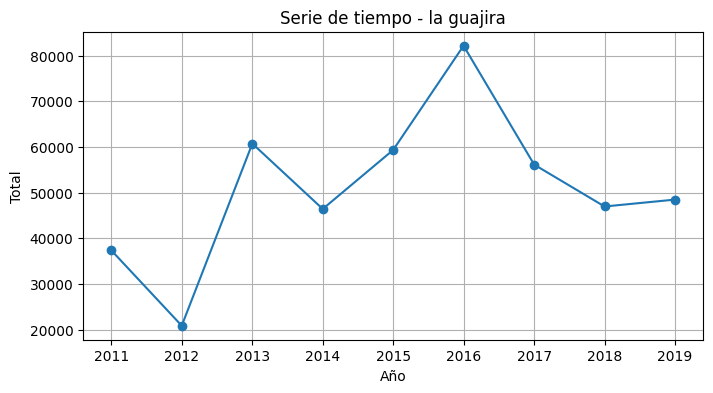

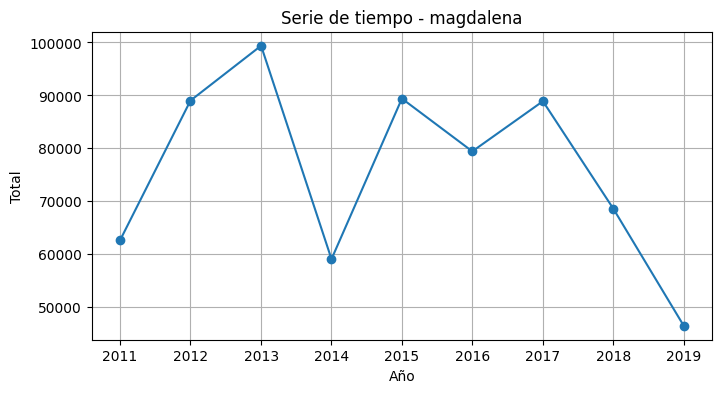

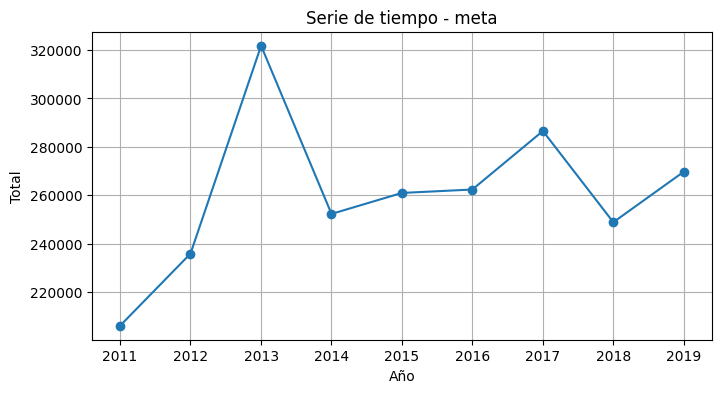

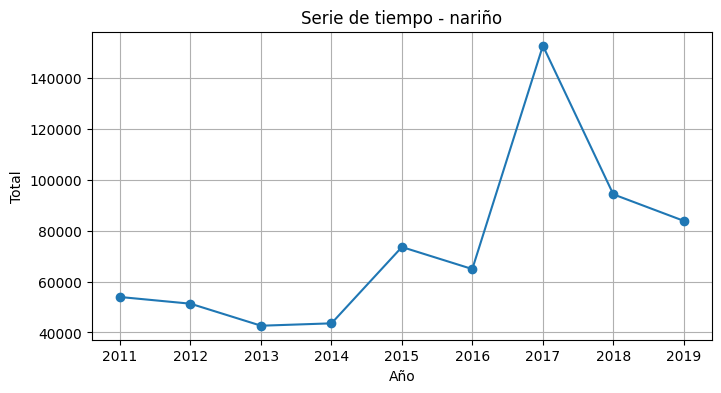

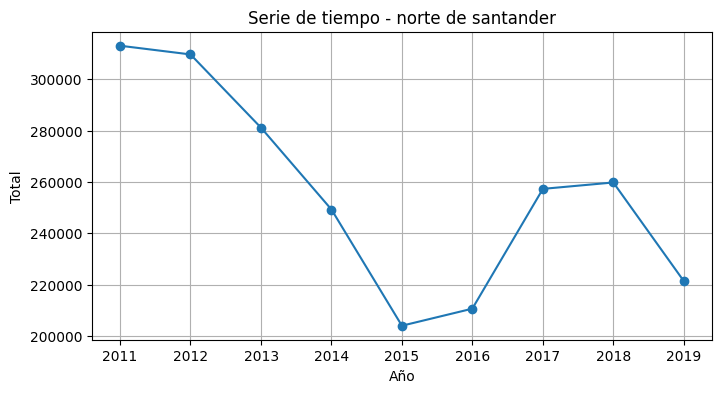

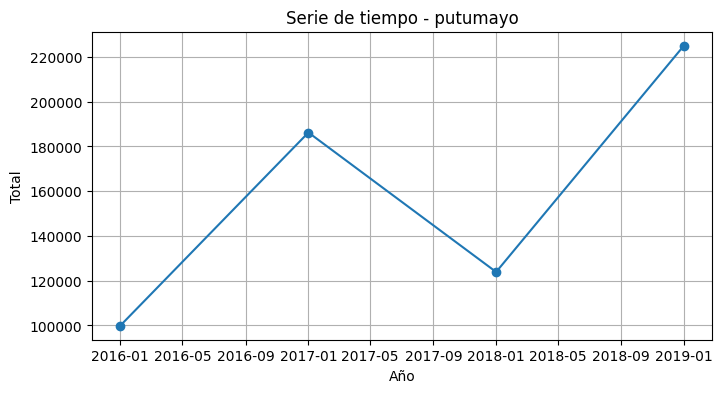

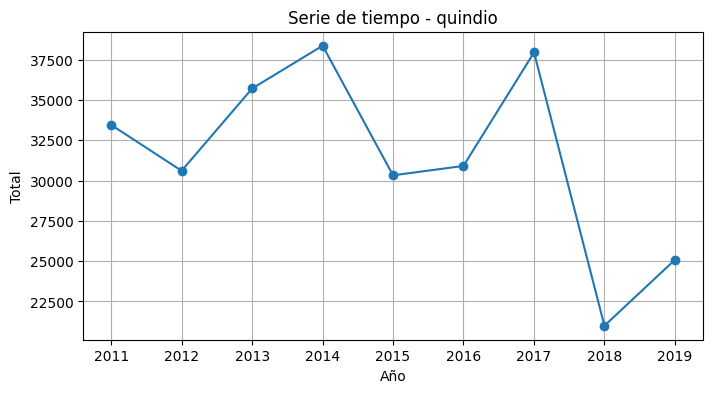

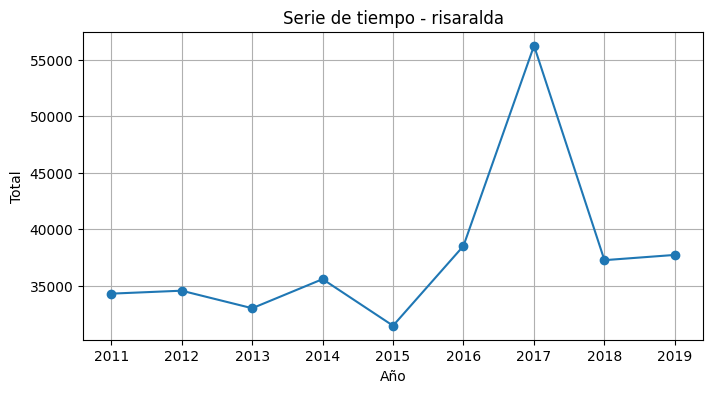

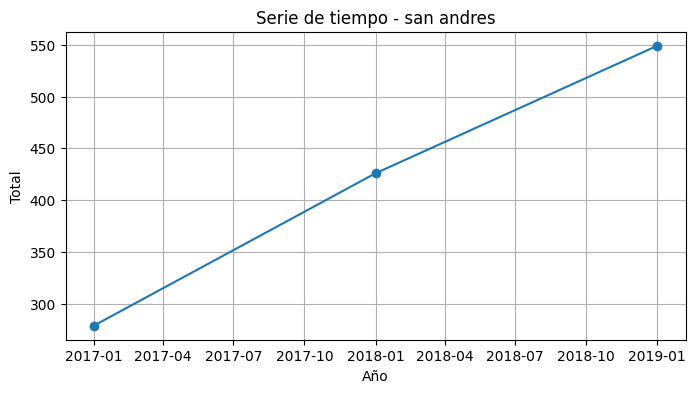

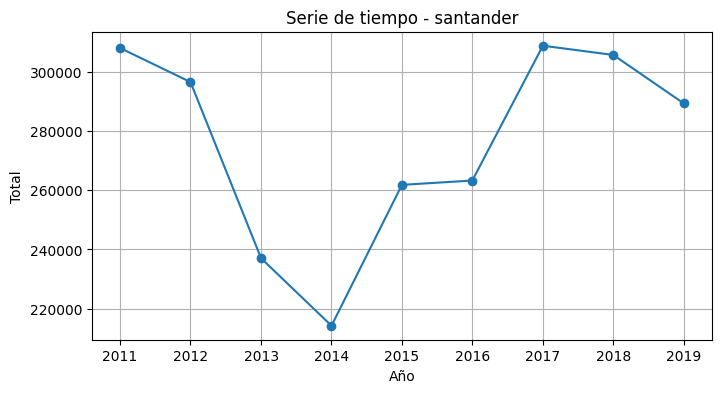

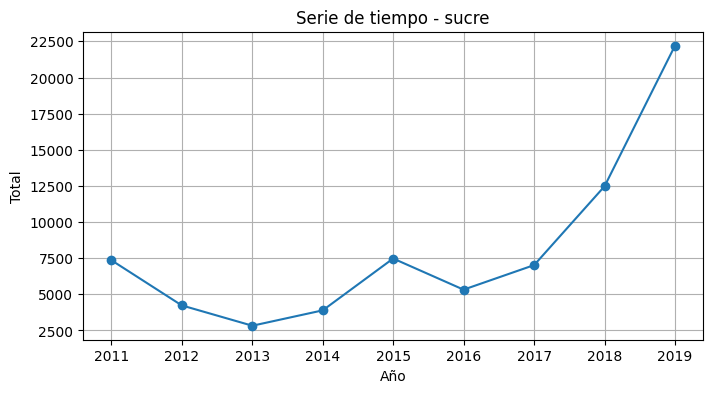

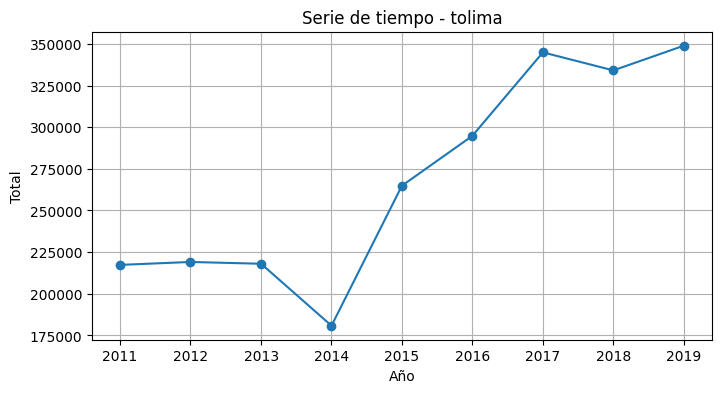

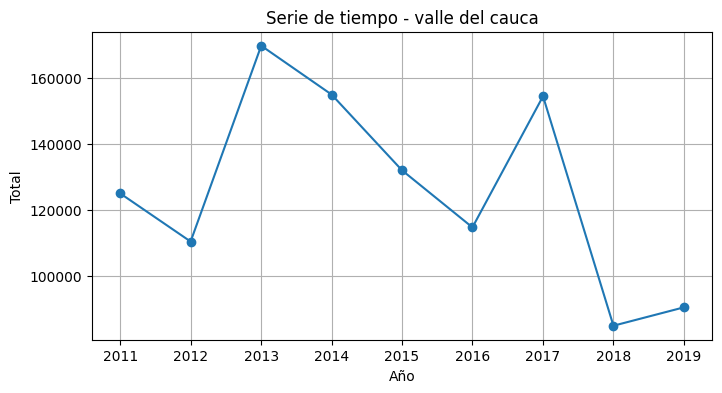

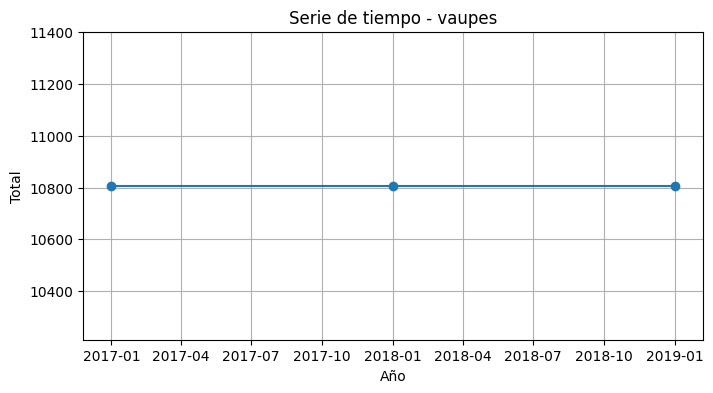

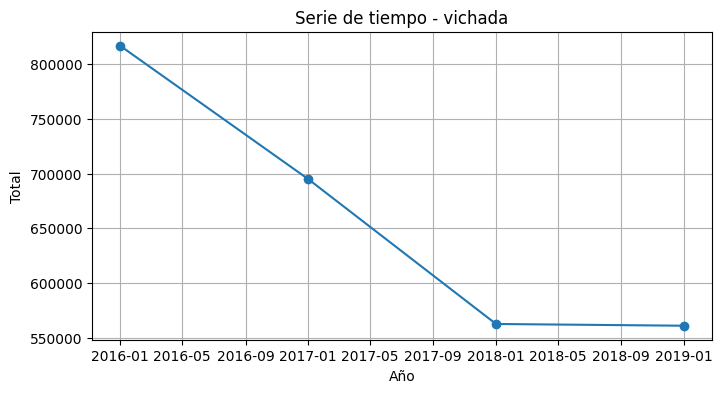

In [11]:
for depto, subset in df_dpto.groupby('depto'):
    plt.figure(figsize=(8, 4))
    
    plt.plot(subset['Fecha'], subset['total'], marker='o')
    
    plt.title(f"Serie de tiempo - {depto}")
    plt.xlabel("Año")
    plt.ylabel("Total")
    plt.grid(True)
    
    plt.show()


In [12]:
subset = df_dpto[df_dpto['depto'] == depto].sort_values('Fecha')

# Crear índice de tiempo: 1, 2, ..., 9
subset['t'] = range(1, len(subset) + 1)

# Variable dependiente
Y = subset['total']
# Variable independiente
X = subset[['t']]


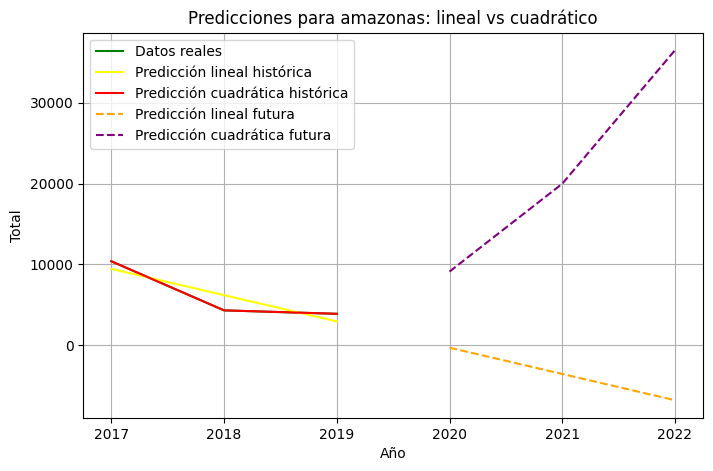

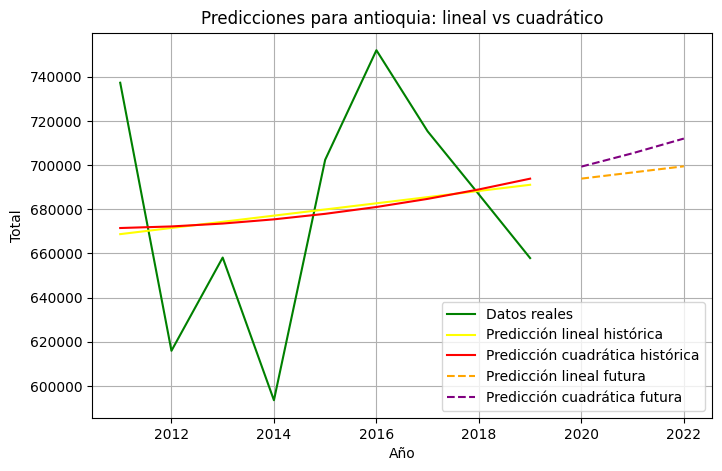

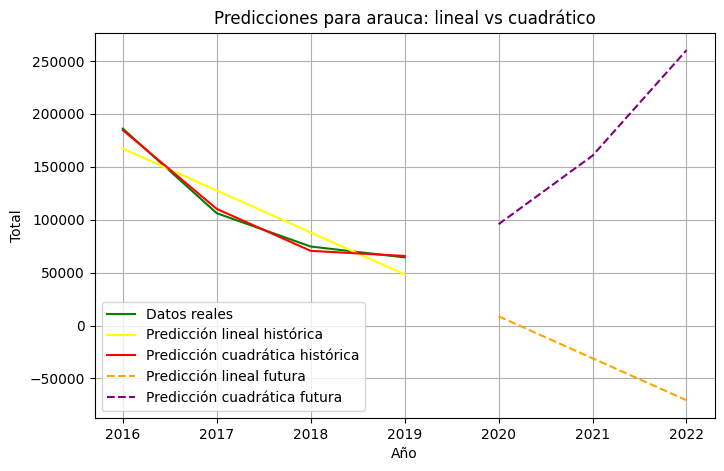

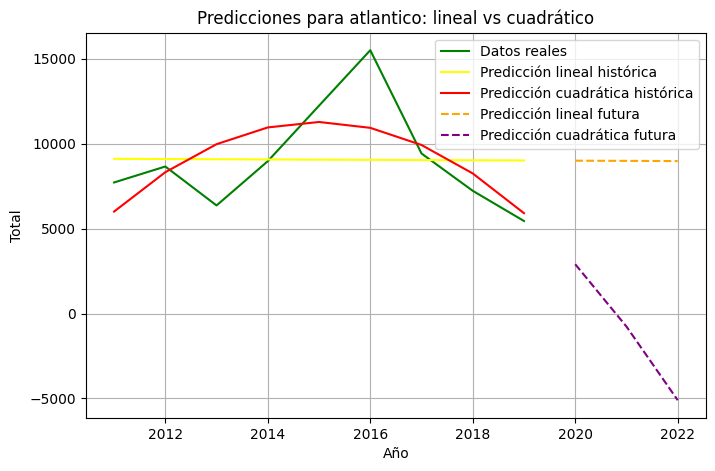

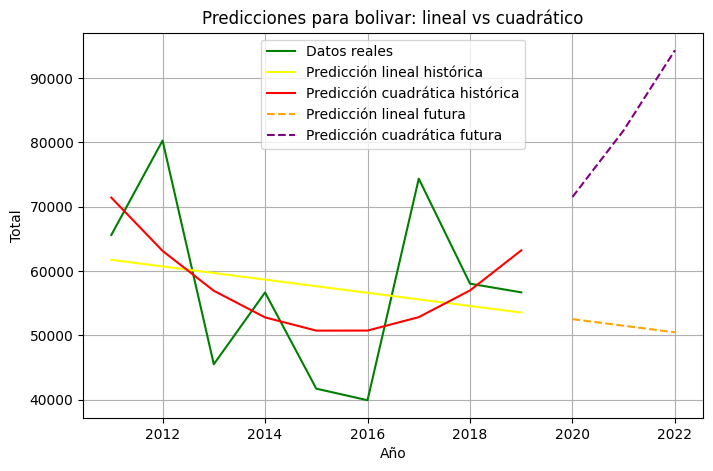

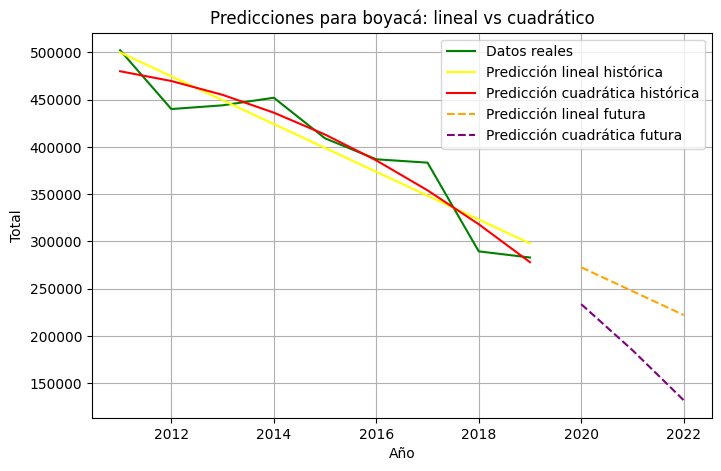

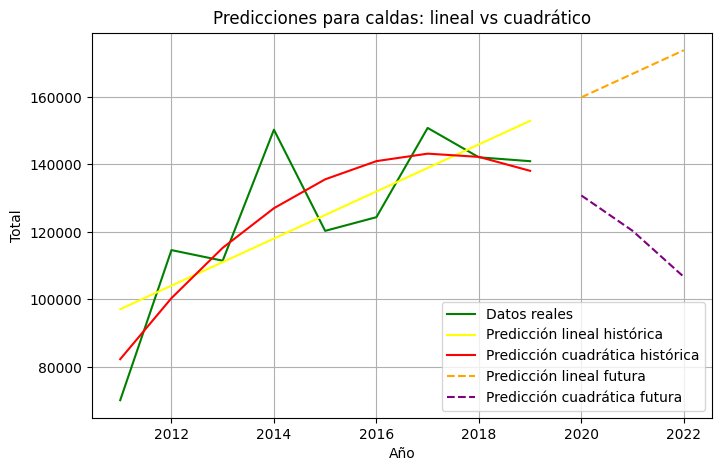

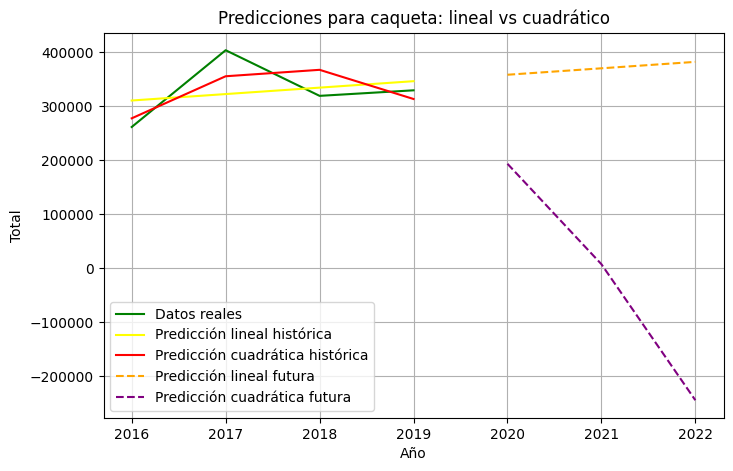

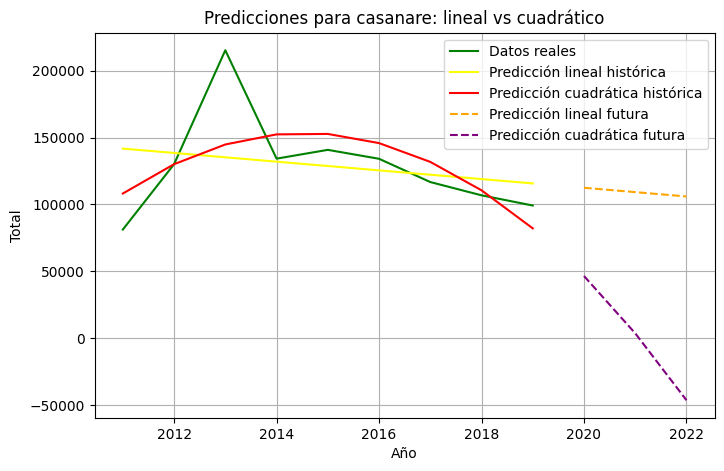

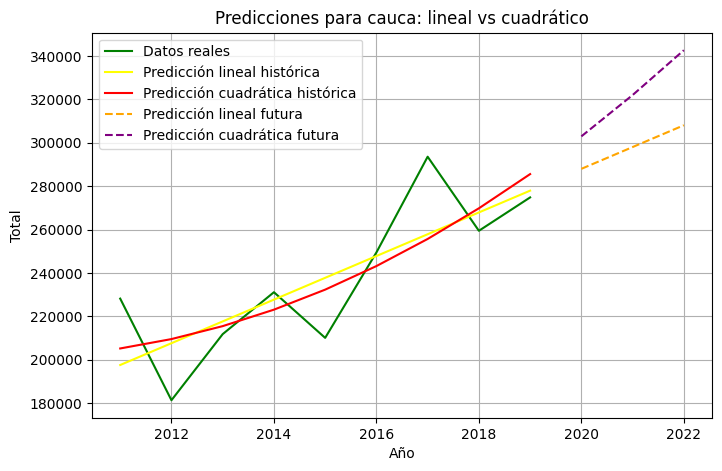

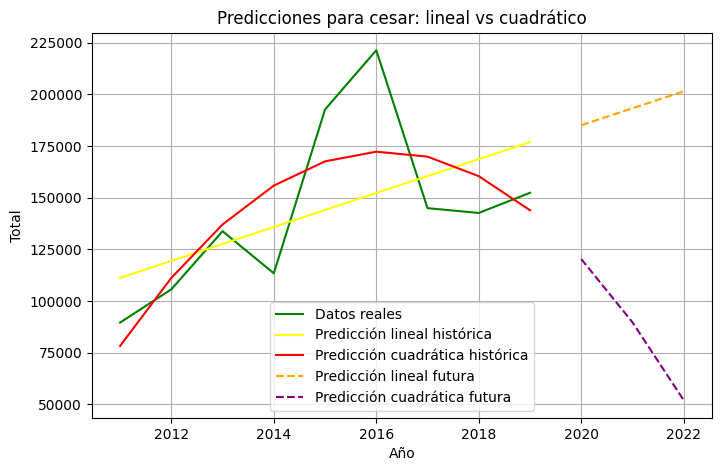

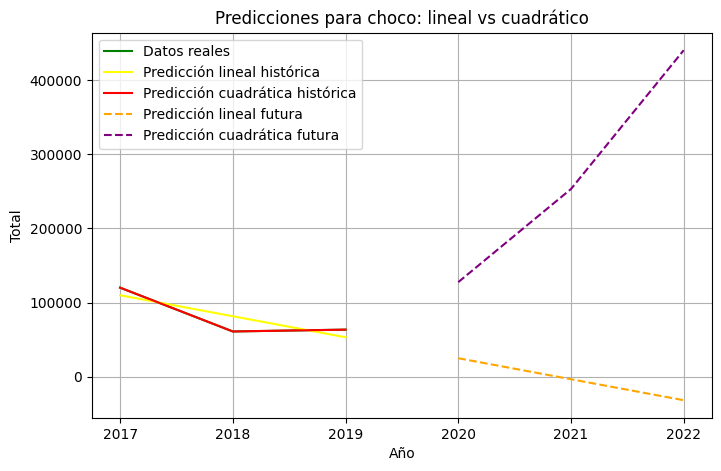

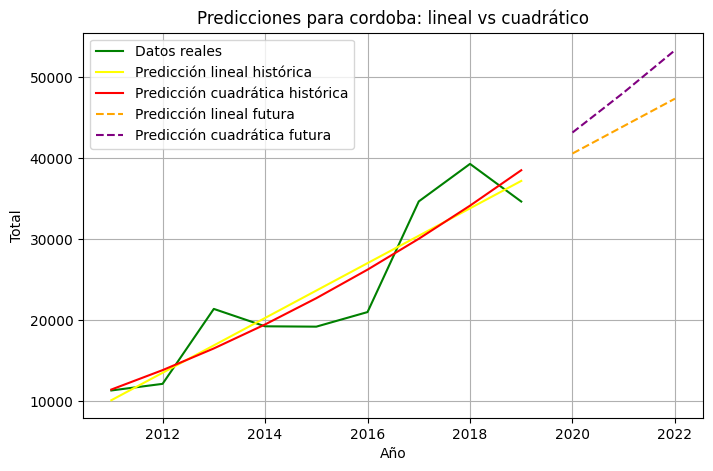

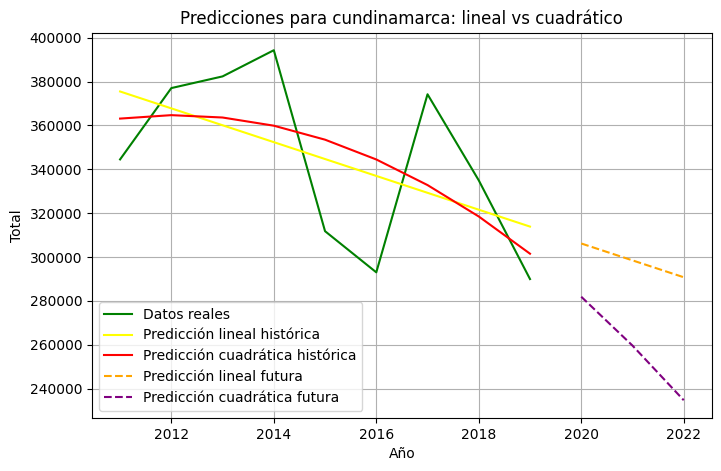

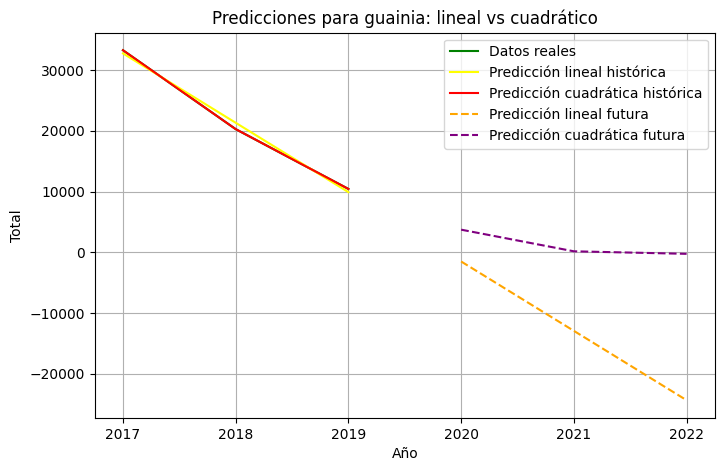

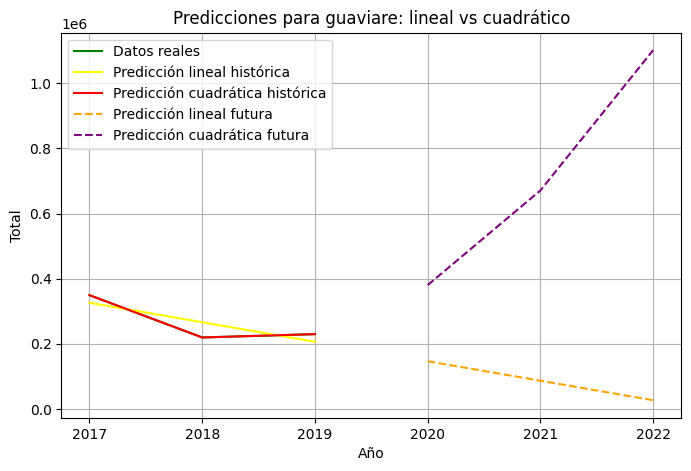

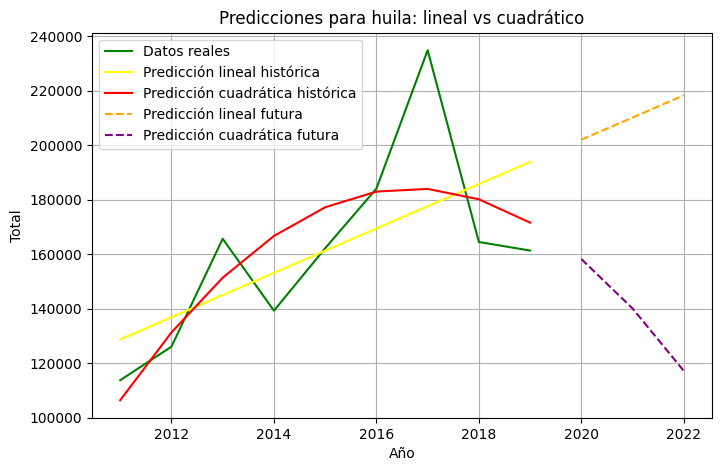

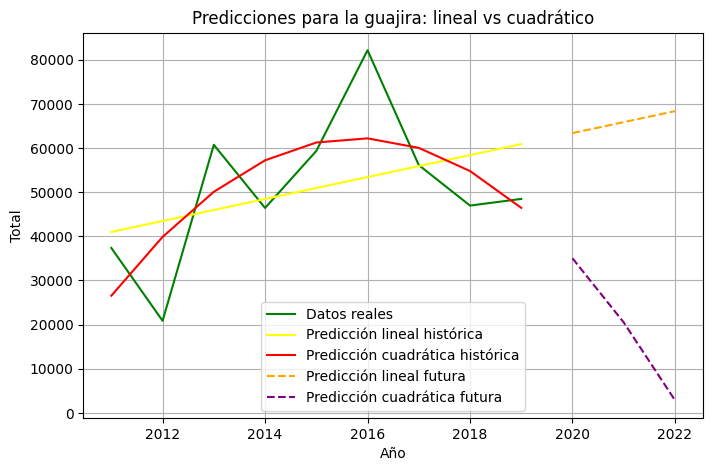

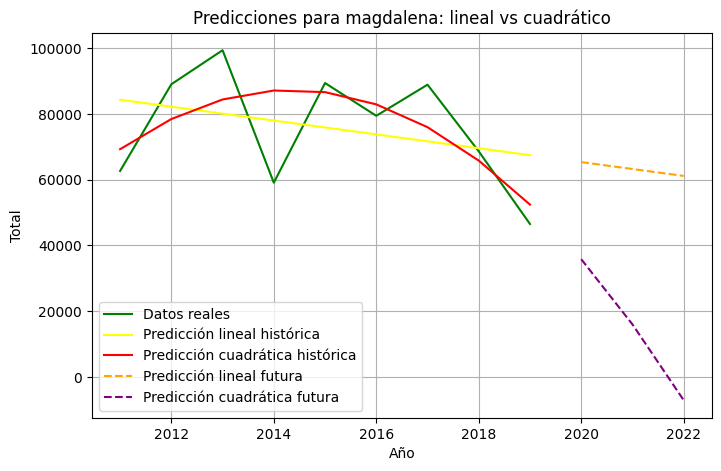

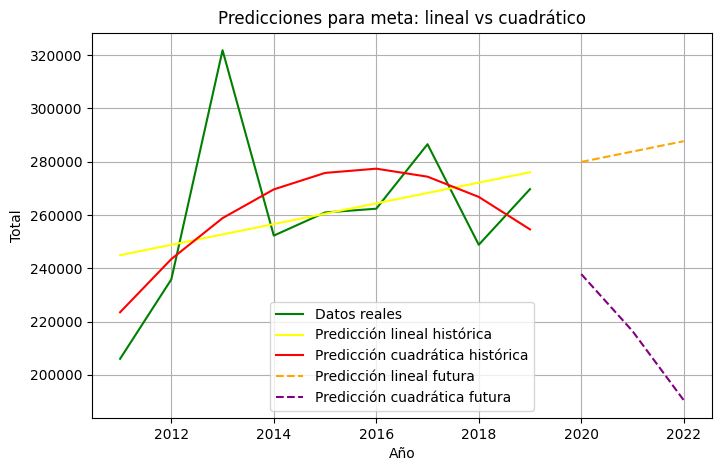

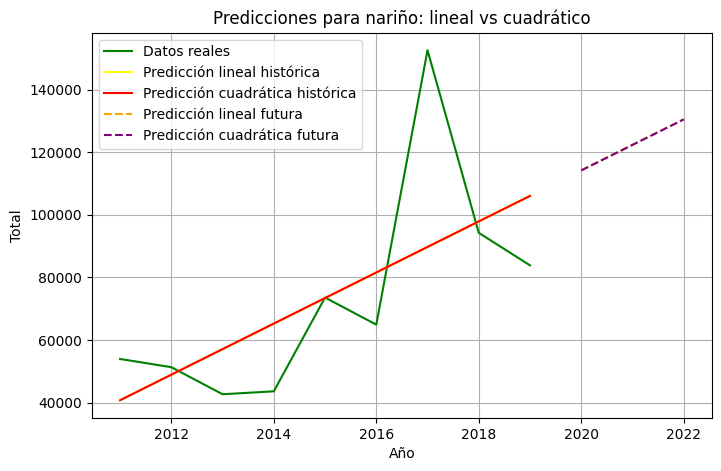

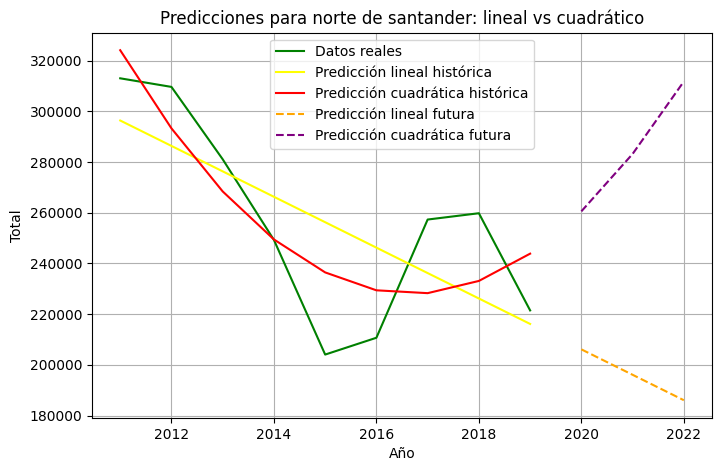

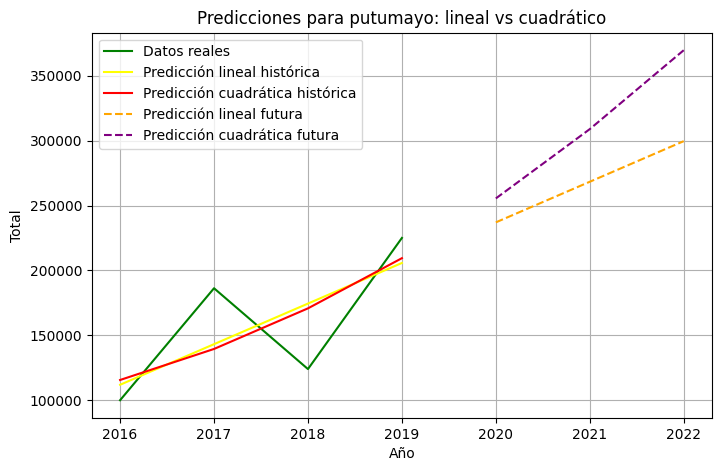

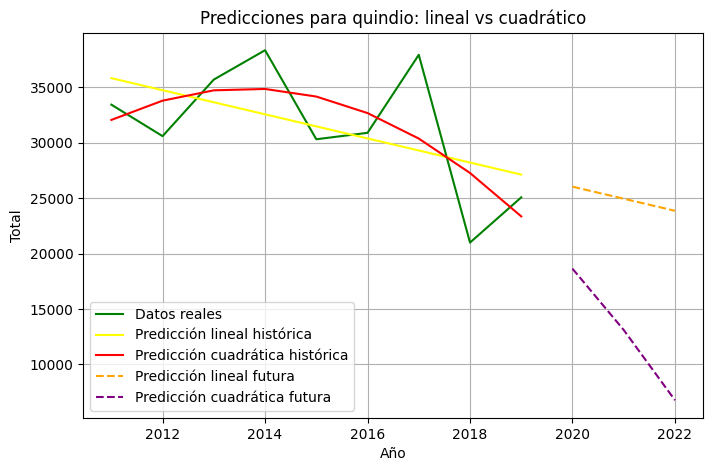

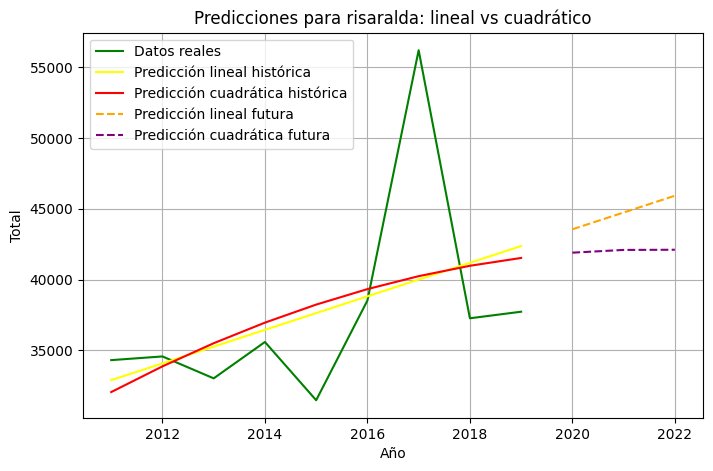

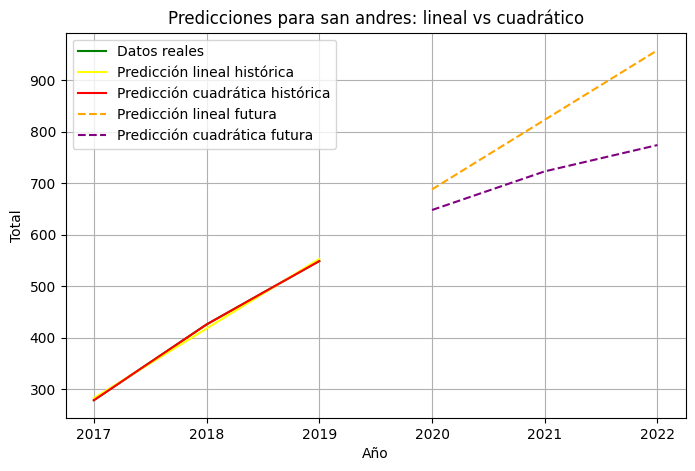

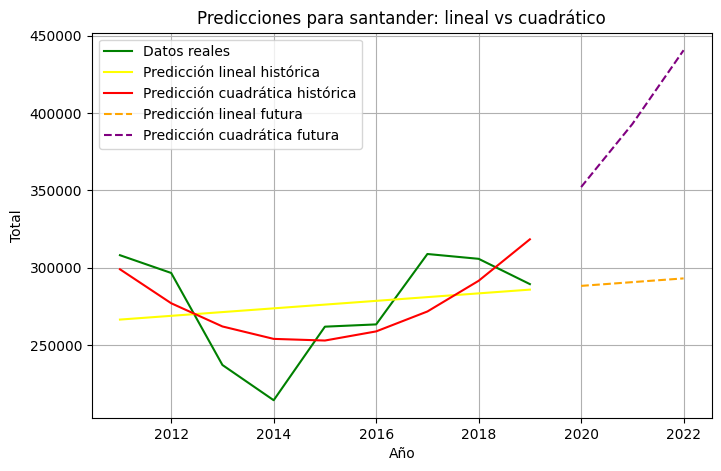

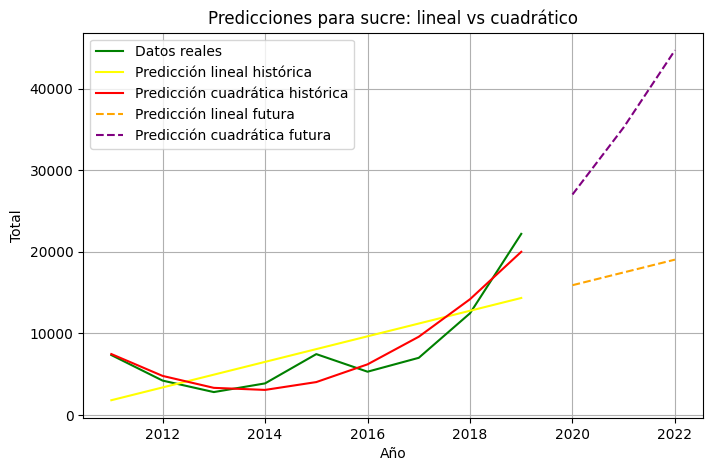

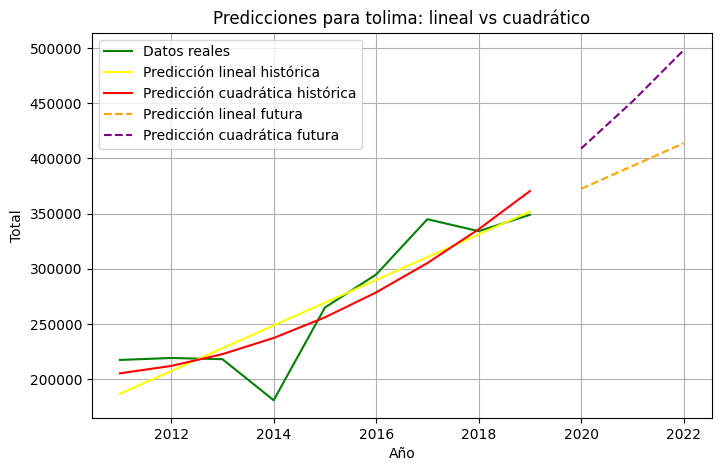

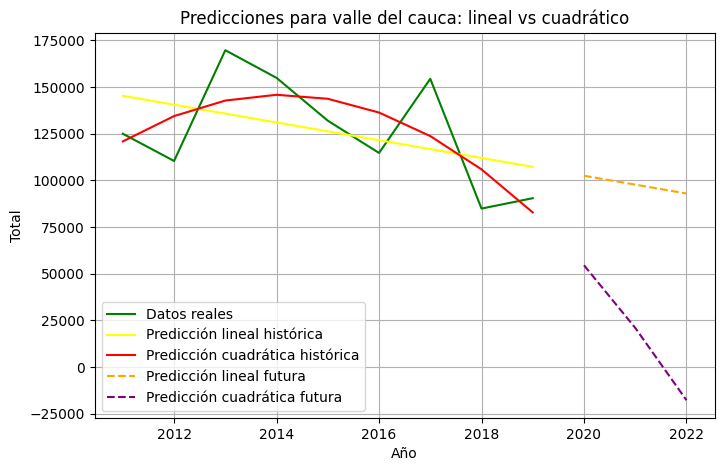

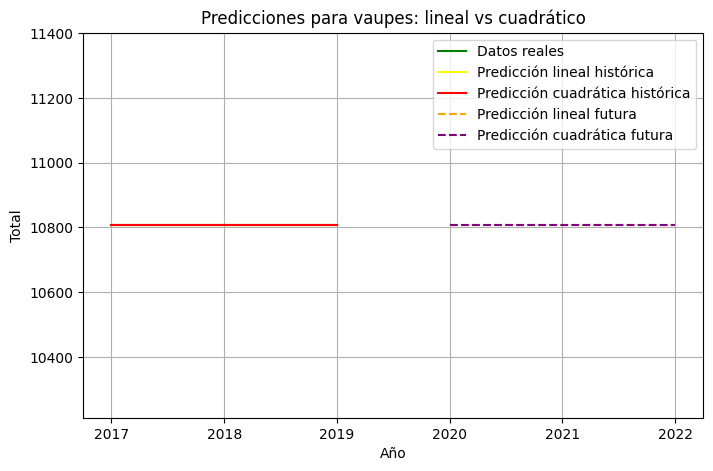

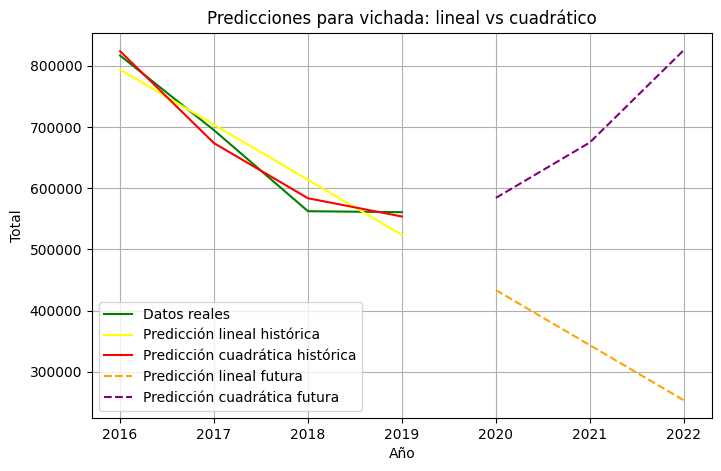

       t       t2    Pred_lineal  Pred_cuadratico      depto
0   2020  4080400    -323.333333      9094.999998   amazonas
1   2021  4084441   -3574.833333     19970.999998   amazonas
2   2022  4088484   -6826.333333     36497.999998   amazonas
3   2020  4080400  693874.972222    699308.880953  antioquia
4   2021  4084441  696666.855556    705361.109524  antioquia
..   ...      ...            ...              ...        ...
91  2021  4084441   10807.000000     10807.000000     vaupes
92  2022  4088484   10807.000000     10807.000000     vaupes
93  2020  4080400  433611.000000    584157.250031    vichada
94  2021  4084441  343554.100000    674755.850021    vichada
95  2022  4088484  253497.200000    825572.950012    vichada

[96 rows x 5 columns]


In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame vacío para guardar todas las predicciones
predicciones_futuras = pd.DataFrame()

for depto, subset in df_dpto.groupby('depto'):
    subset = subset.sort_values('Fecha').copy()
    
    # Usar años reales como t
    subset['Fecha'] = pd.to_datetime(subset['Fecha'])
    subset['t'] = subset['Fecha'].dt.year
    subset['t2'] = subset['t'] ** 2  # Modelo cuadrático
    
    # Variable dependiente
    Y = subset['total']
    # Variables independientes
    X = subset[['t']]
    X2 = subset[['t', 't2']]
    
    # Crear y ajustar modelos
    model_lin = LinearRegression()
    model_quad = LinearRegression()
    
    model_lin.fit(X, Y)
    model_quad.fit(X2, Y)
    
    # Predicciones históricas
    y_pred_lin = model_lin.predict(X)
    y_pred_quad = model_quad.predict(X2)
    
    # -----------------------------
    # Predicciones futuras
    # -----------------------------
    años_futuros = pd.DataFrame({
        't': range(subset['t'].max() + 1, subset['t'].max() + 4)  # próximos 3 años
    })
    años_futuros['t2'] = años_futuros['t'] ** 2
    
    años_futuros['Pred_lineal'] = model_lin.predict(años_futuros[['t']])
    años_futuros['Pred_cuadratico'] = model_quad.predict(años_futuros[['t', 't2']])
    años_futuros['depto'] = depto
    
    # Guardar las predicciones
    predicciones_futuras = pd.concat([predicciones_futuras, años_futuros], ignore_index=True)
    
    # -----------------------------
    # Graficar histórico + predicciones
    # -----------------------------
    plt.figure(figsize=(8,5))
    plt.plot(subset['t'], Y, color='green', label='Datos reales')
    plt.plot(subset['t'], y_pred_lin, color='yellow', label='Predicción lineal histórica')
    plt.plot(subset['t'], y_pred_quad, color='red', label='Predicción cuadrática histórica')
    plt.plot(años_futuros['t'], años_futuros['Pred_lineal'], '--', color='orange', label='Predicción lineal futura')
    plt.plot(años_futuros['t'], años_futuros['Pred_cuadratico'], '--', color='purple', label='Predicción cuadrática futura')
    
    plt.xlabel('Año')
    plt.ylabel('Total')
    plt.title(f'Predicciones para {depto}: lineal vs cuadrático')
    plt.legend()
    plt.grid(True)
    plt.show()

# Mostrar todas las predicciones futuras
print(predicciones_futuras)


Cargar datos de la region

In [22]:
df_region = pd.read_csv("..\\..\\data\\processed\\suelo_forestal_region.csv")

In [23]:
df_region['Fecha'] = pd.to_datetime(df_region['ano'], format='%Y')
df_region = df_region.sort_values(['region', 'Fecha'])

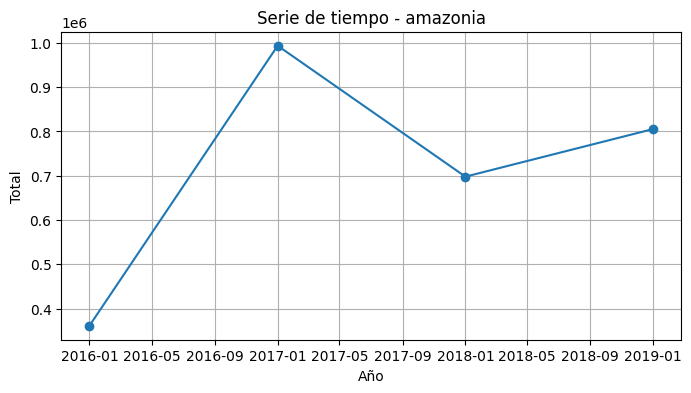

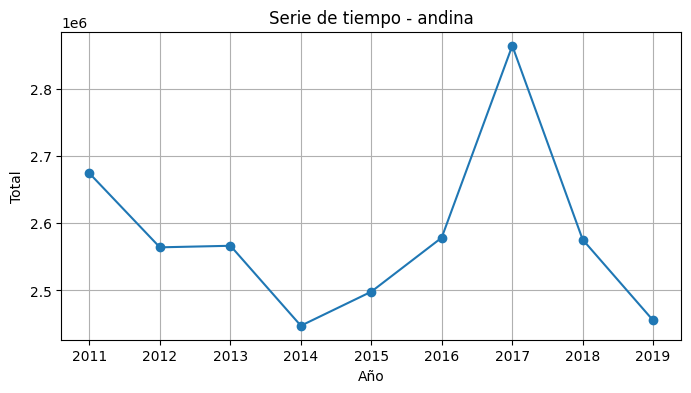

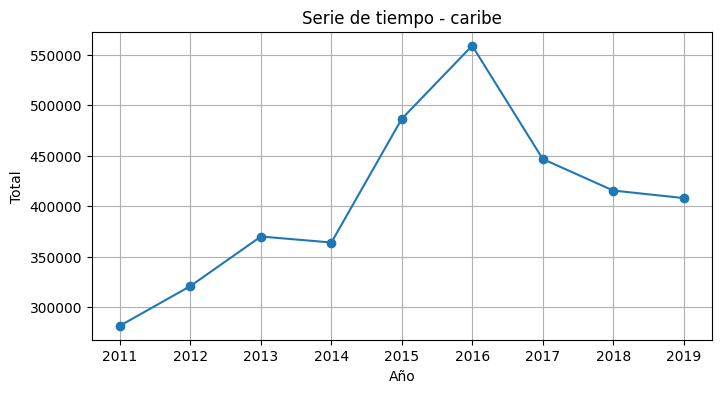

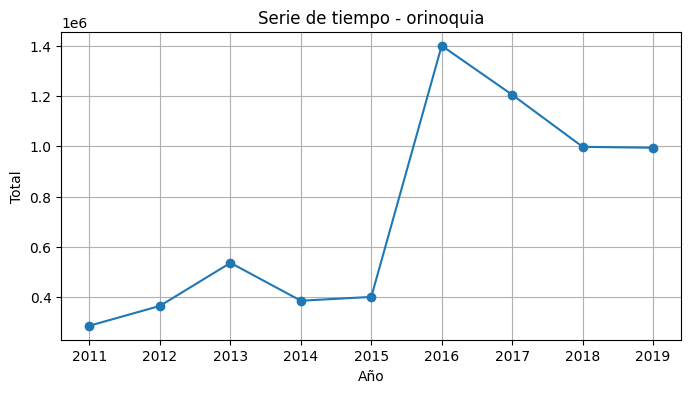

In [24]:
for region, subset in df_region.groupby('region'):
    plt.figure(figsize=(8, 4))
    
    plt.plot(subset['Fecha'], subset['total'], marker='o')
    
    plt.title(f"Serie de tiempo - {region}")
    plt.xlabel("Año")
    plt.ylabel("Total")
    plt.grid(True)
    
    plt.show()

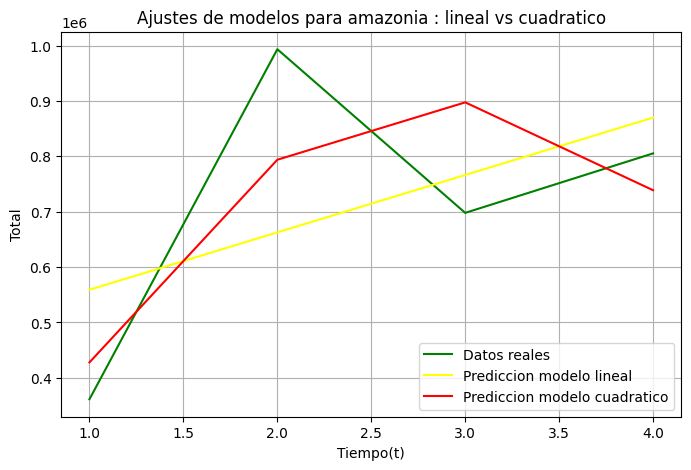

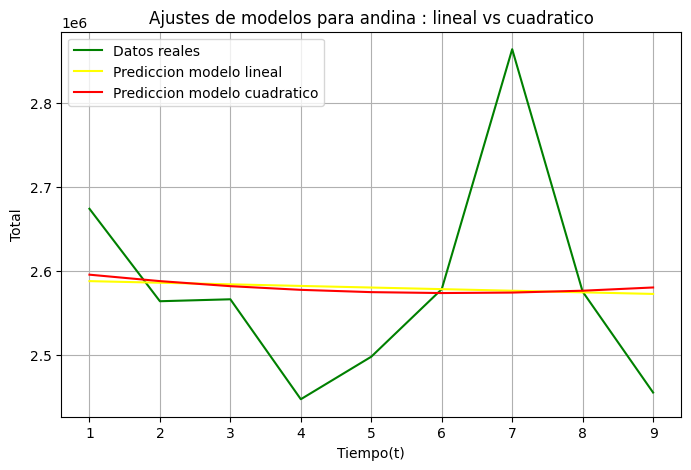

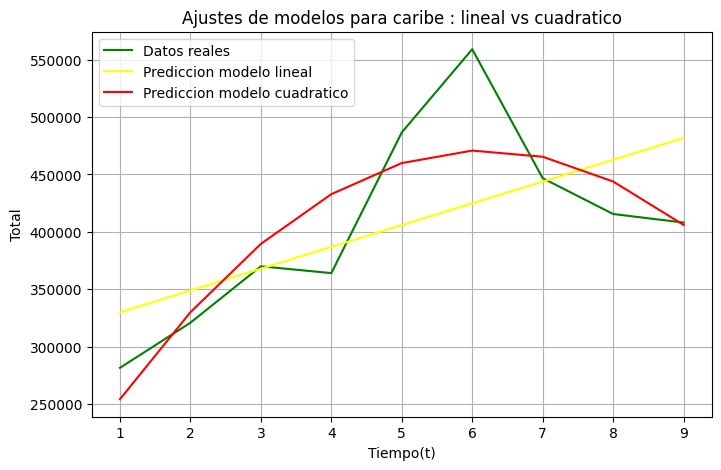

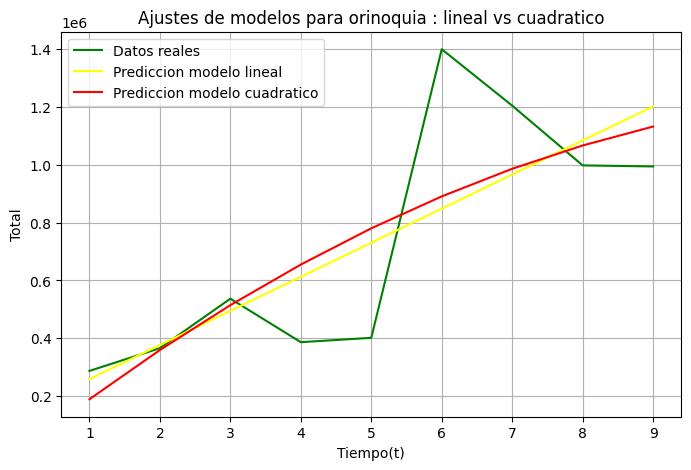

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame vacío para guardar predicciones futuras
predicciones_futuras_region = pd.DataFrame()

for region, subset in df_region.groupby('region'):
    subset = subset.sort_values('Fecha').copy()
    
    # Usar años reales como t
    subset['Fecha'] = pd.to_datetime(subset['Fecha'])
    subset['t'] = subset['Fecha'].dt.year
    subset['t2'] = subset['t'] ** 2  # Modelo cuadrático
    
    # Variable dependiente
    Y = subset['total']
    
    # Variables independientes
    X = subset[['t']]            # Modelo lineal
    X2 = subset[['t', 't2']]     # Modelo cuadrático
    
    # Crear y ajustar modelos
    model_lin = LinearRegression()
    model_quad = LinearRegression()
    
    model_lin.fit(X, Y)
    model_quad.fit(X2, Y)
    
    # Predicciones históricas
    y_pred_lin = model_lin.predict(X)
    y_pred_quad = model_quad.predict(X2)
    
    # -----------------------------
    # Predicciones futuras (próximos 3 años)
    # -----------------------------
    años_futuros = pd.DataFrame({
        't': range(subset['t'].max() + 1, subset['t'].max() + 4)
    })
    años_futuros['t2'] = años_futuros['t'] ** 2
    
    años_futuros['Pred_lineal'] = model_lin.predict(años_futuros[['t']])
    años_futuros['Pred_cuadratico'] = model_quad.predict(años_futuros[['t', 't2']])
    años_futuros['region'] = region
    
    # Guardar predicciones
    predicciones_futuras_region = pd.concat([predicciones_futuras_region, años_futuros], ignore_index=True)
    
    # -----------------------------
    # Graficar histórico + predicciones
    # -----------------------------
    plt.figure(figsize=(8,5))
    plt.plot(subset['t'], Y, color='green', label='Datos reales')
    plt.plot(subset['t'], y_pred_lin, color='yellow', label='Predicción lineal histórica')
    plt.plot(subset['t'], y_pred_quad, color='red', label='Predicción cuadrática histórica')
    plt.plot(años_futuros['t'], años_futuros['Pred_lineal'], '--', color='orange', label='Predicción lineal futura')
    plt.plot(años_futuros['t'], años_futuros['Pred_cuadratico'], '--', color='purple', label='Predicción cuadrática futura')
    
    plt.xlabel('Año')
    plt.ylabel('Total')
    plt.title(f'Predicciones para {region}: lineal vs cuadrático')
    plt.legend()
    plt.grid(True)
    plt.show()

# Mostrar todas las predicciones futuras
print(predicciones_futuras_region)
